## Optimisation de budget
**Méthode : Grey Wolf Optimizer**





---
**Description :**

L’algorithme du Loup Gris (GWO) est un algorithme d’optimisation inspiré du comportement de chasse des loups gris. Chaque solution possible est représentée par un loup, et les meilleurs loups (alpha, beta, delta) guident les autres pour explorer l’espace des solutions. Au fil des itérations, tous les loups convergent vers la solution optimale, ce qui permet de résoudre des problèmes complexes où le meilleur choix n’est pas connu à l’avance, comme l’allocation de ressources ou l’optimisation de budgets.

Dans ce projet, le GWO est utilisé pour répartir un budget entre plusieurs campagnes dont les performances sont connues, afin de démontrer le fonctionnement de l’algorithme et visualiser comment il converge vers la répartition qui maximise le ROI.

<br>

**Objectif :**
maximiser le ROI total en allouant intelligemment le budget aux campagnes les plus efficaces.

<br>

**Fonctionnement :**

Chaque “loup” représente une solution candidate, c’est-à-dire une répartition possible du budget entre les campagnes. Le processus d’optimisation se déroule en plusieurs étapes :

- Génération aléatoire des loups avec différentes répartitions initiales.

- Évaluation de chaque solution à l’aide d’une fonction de fitness (ici, le ROI).

- Identification des trois meilleurs loups (alpha, beta, delta) qui servent de référence.

- Ajustement des positions : chaque loup modifie sa répartition pour se rapprocher des leaders.

- Répétition du processus sur plusieurs itérations jusqu’à convergence vers la solution optimale.

<br>

**Résultat :** le loup alpha final représente la répartition optimale du budget. Approche de la solution optimale permettant la meilleure allocation posssible au budget.

**Visualisation :** Graphique montrant l’évolution du meilleur ROI au fil des itérations, illustrant la convergence de l’algorithme.


---
<br>

**Remarque :**

Dans un cas réel, les coefficients de ROI ne sont pas connus exactement. On peut les estimer à partir de données historiques ou les simuler, ce qui rend l’algorithme pertinent pour trouver la meilleure allocation malgré l’incertitude.

Meilleure allocation trouvée : [  0. 100.   0.]
ROI correspondant : 120.0


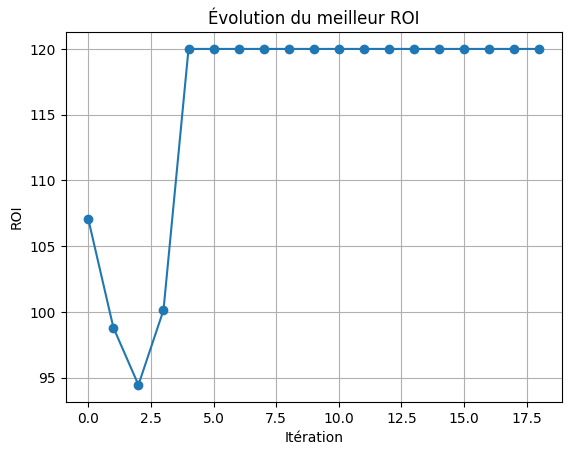

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Paramètres de l’algorithme

nb_loups = 5  #nombre de solutions à tester à chaque itération.
iteration = 20  #nombre de tours d’itération pour faire converger les loups
nb_campagne = 3   #nombre de campagnes ou on va  repartir le budget
budget_total = 100  #budget total à répartir

### Fonction de fitness (ROI)

coefficients = np.array([0.8, 1.2, 1.0])  # efficacité des campagnes
def fitness(allocation):
    allocation = np.clip(allocation, 0, budget_total)  # respect des limites
    return np.sum((allocation/100) * coefficients * 100)  # ROI fictif

### Initialisation aléatoire
positions = np.random.dirichlet(np.ones(nb_campagne), size=nb_loups) * budget_total

### Suivi de l’évolution
best_history = []

for iteration in range(iteration):
    best_history = []

for t in range(iteration):
    # Évaluer les loups
    scores = np.array([fitness(pos) for pos in positions])

    # Identifier alpha, beta, delta
    idx_sorted = np.argsort(-scores)  # tri décroissant (maximisation)
    alpha, beta, delta = positions[idx_sorted[0]], positions[idx_sorted[1]], positions[idx_sorted[2]]

    # Stocker meilleur score
    best_history.append(scores[idx_sorted[0]])

    # Mise à jour des positions
    a = 2 - t * (2/iteration)
    for i in range(nb_loups):
        for leader in [alpha, beta, delta]:
            r1, r2 = np.random.rand(nb_campagne), np.random.rand(nb_campagne)
            A = 2 * a * r1 - a
            C = 2 * r2
            D = np.abs(C * leader - positions[i])
            positions[i] = positions[i] - A * D

        # S'assurer que chaque allocation >= 0
        positions[i] = np.clip(positions[i], 0, None)

        # Réajuster pour respecter le budget total
        if positions[i].sum() == 0:
            positions[i] = np.ones(nb_campagne) * (budget_total / nb_campagne)
        else:
            positions[i] = positions[i] / positions[i].sum() * budget_total


  # --- Résultat final ---
best_allocation = positions[idx_sorted[0]]
print("Meilleure allocation trouvée :", best_allocation)
print("ROI correspondant :", fitness(best_allocation))

# --- Visualisation ---
plt.plot(best_history, marker='o')
plt.title("Évolution du meilleur ROI")
plt.xlabel("Itération")
plt.ylabel("ROI")
plt.grid(True)
plt.show()
